In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./merged_features_original_18_0108_51_11.csv')

print(df.head())

     filename  A_HOMO_LUMO  B_HOMO_LUMO  A_Dipole  B_Dipole   mean_CN  \
0  CADPAB.cif     2.721574     7.285991    5.4464    4.2160  7.559311   
1  CECPUY.cif     2.773650     5.426899    4.8892    2.7691  7.168179   
2  CECRIO.cif     2.793827     5.501169    4.8046    0.7412  7.984630   
3  CECXEQ.cif     2.775525     5.427855    4.9502    2.2394  6.967348   
4  DOJKIY.cif     2.701374     6.494500    5.1755    2.5365  7.159820   

   mean_NDV  max packing efficiency   density        vpa  packing fraction  \
0  0.290453                0.072656  1.560219  10.056343          0.091649   
1  0.313178                0.077633  1.560587  10.851112          0.096749   
2  0.284820                0.075917  1.320394  10.020311          0.083520   
3  0.313415                0.079289  1.648445  10.272777          0.102196   
4  0.323809                0.073894  1.558056  11.213218          0.094581   

    SC_atom      SC_cell  E_els    E_x  E_rep  E_orb  E_DFTc  E_dc  polarity  
0  5.169925  

In [4]:
from sklearn.model_selection import train_test_split
df_reset = df.reset_index(drop=True)
features = df.iloc[0:, 1:-1]  
polarity = df.iloc[:, -1]
print(features.head())
print(polarity.head())

   A_HOMO_LUMO  B_HOMO_LUMO  A_Dipole  B_Dipole   mean_CN  mean_NDV  \
0     2.721574     7.285991    5.4464    4.2160  7.559311  0.290453   
1     2.773650     5.426899    4.8892    2.7691  7.168179  0.313178   
2     2.793827     5.501169    4.8046    0.7412  7.984630  0.284820   
3     2.775525     5.427855    4.9502    2.2394  6.967348  0.313415   
4     2.701374     6.494500    5.1755    2.5365  7.159820  0.323809   

   max packing efficiency   density        vpa  packing fraction   SC_atom  \
0                0.072656  1.560219  10.056343          0.091649  5.169925   
1                0.077633  1.560587  10.851112          0.096749  4.954196   
2                0.075917  1.320394  10.020311          0.083520  5.700440   
3                0.079289  1.648445  10.272777          0.102196  4.954196   
4                0.073894  1.558056  11.213218          0.094581  4.857981   

       SC_cell  E_els    E_x  E_rep  E_orb  E_DFTc  E_dc  
0   372.234600 -49.08  -1.00   7.40  -4.05   

In [5]:
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
import shap
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [26]:
# Initialize the XGBClassifier
clf = XGBClassifier()

# Define the parameter grid for XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization term on weights
    'reg_lambda': [0.1, 1, 2],  # L2 regularization term on weights
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(features, polarity)

# Output the best parameters and the corresponding best score
print('Best parameters:', grid_search.best_params_)
print('Best accuracy score:', grid_search.best_score_)

# Make predictions on the entire dataset using the model with the best parameters
best_model = grid_search.best_estimator_
predictions = best_model.predict(features)

# Calculate the accuracy on the entire dataset
accuracy = accuracy_score(polarity, predictions)
print('Accuracy score on the entire dataset:', accuracy)

# Create a TreeExplainer object
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(features)


Manually load best hyperparameters

In [7]:
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the best hyperparameters
best_params = {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}

# Create an instance of the XGBoost model and set the hyperparameters
clf = XGBClassifier(**best_params)

# Use cross-validation to compute the model's accuracy
scores = cross_val_score(clf, features, polarity, cv=5, scoring='accuracy')

# Print the accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# If you want to train the model and evaluate its performance on the entire dataset, you can do this:
clf.fit(features, polarity)  # Train the model
predictions = clf.predict(features)  # Make predictions

# Calculate the accuracy on the entire dataset
accuracy = accuracy_score(polarity, predictions)
print('Accuracy score on the entire dataset:', accuracy)

Accuracy: 0.92 (+/- 0.17)
Accuracy score on the entire dataset: 1.0


In [8]:
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier

# 定义XGBoost模型
model = XGBClassifier()

# 使用交叉验证计算模型的准确度
scores = cross_val_score(model, features, polarity, cv=5, scoring='accuracy')

# 打印准确度
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [9]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features)

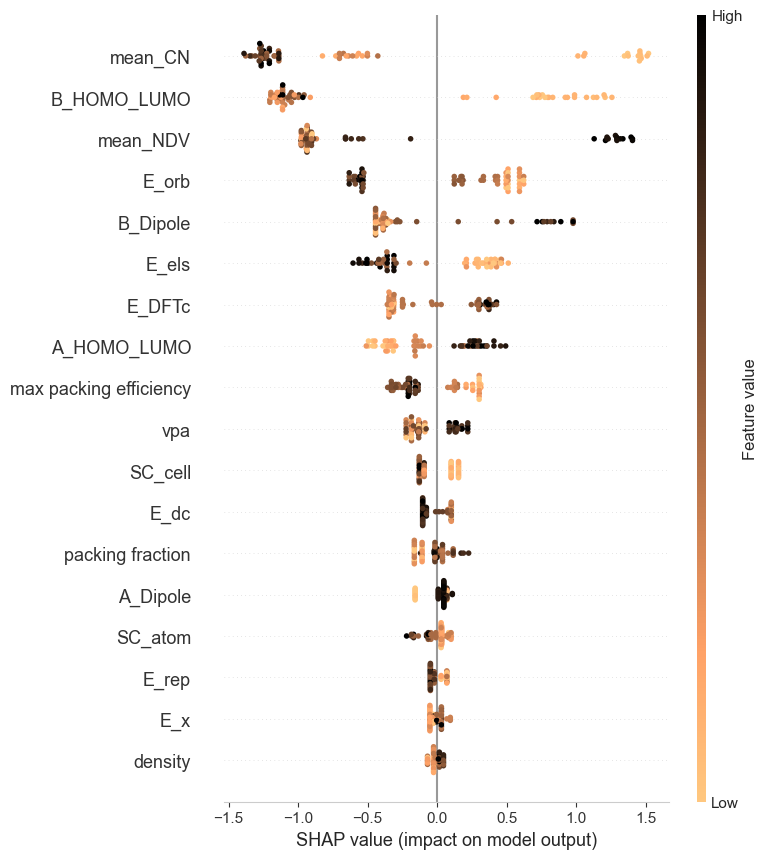

<Figure size 640x480 with 0 Axes>

In [10]:
plt.grid(False)  
shap.summary_plot(shap_values, features, feature_names=features.columns, cmap='copper_r')
#plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Arial'
plt.rcParams['font.size'] = 14  
plt.savefig('SHAP_value_impact_on_model_extended_data.pdf', format='pdf',bbox_inches='tight')

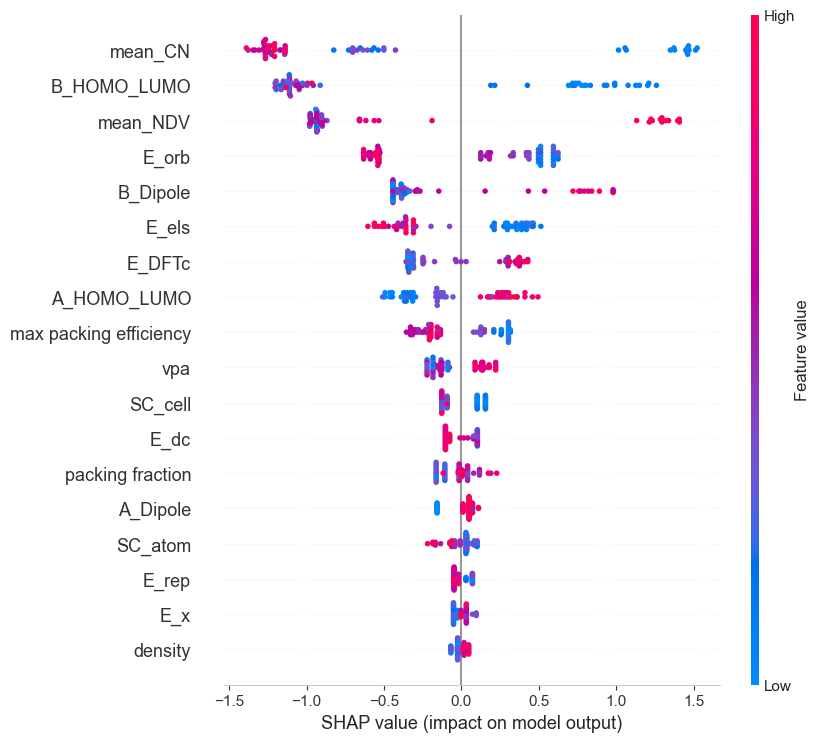

In [11]:
shap_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=features, feature_names=features.columns)
plt.grid(False)  
shap.plots.beeswarm(shap_explanation,max_display=20)

In [12]:
# Feature labels
labels = features.columns
# Plot SHAP values summary plot (Summary Plot)
plt.figure(figsize=(15, 5))
plt.grid(False)  # Turn off grid lines

shap.summary_plot(shap_values, features, plot_type="bar", show=False)
plt.title("SHAP Feature Importance Raw Output")
plt.savefig("SHAP_Feature_Importance_Raw_Output.pdf", format='pdf', bbox_inches='tight')
plt.show()

[[-0.31204012 -0.99384207  0.04879967 ... -0.539759    0.42799294
  -0.1033419 ]
 [-0.15633263 -1.1099806   0.00942053 ...  0.5109365   0.30104834
  -0.1033419 ]
 [-0.14055735 -1.0670028   0.00942053 ...  0.33385885 -0.34557346
   0.10259666]
 ...
 [ 0.49369004  1.1248517   0.07066507 ...  0.1873159   0.02996794
  -0.00991192]
 [ 0.30414274 -1.111181   -0.15744722 ... -0.5315066  -0.34557346
  -0.07685491]
 [ 0.23661849 -1.1490111  -0.15744722 ...  0.12403648 -0.31260008
   0.07702231]]
A_HOMO_LUMO                 2.86
B_HOMO_LUMO                 3.97
A_Dipole                    4.40
B_Dipole                    3.10
mean_CN                     6.33
mean_NDV                    0.34
max packing efficiency      0.08
density                     1.64
vpa                        10.93
packing fraction            0.10
SC_atom                     5.17
SC_cell                   744.47
E_els                     -73.04
E_x                       -12.44
E_rep                      45.58
E_orb        

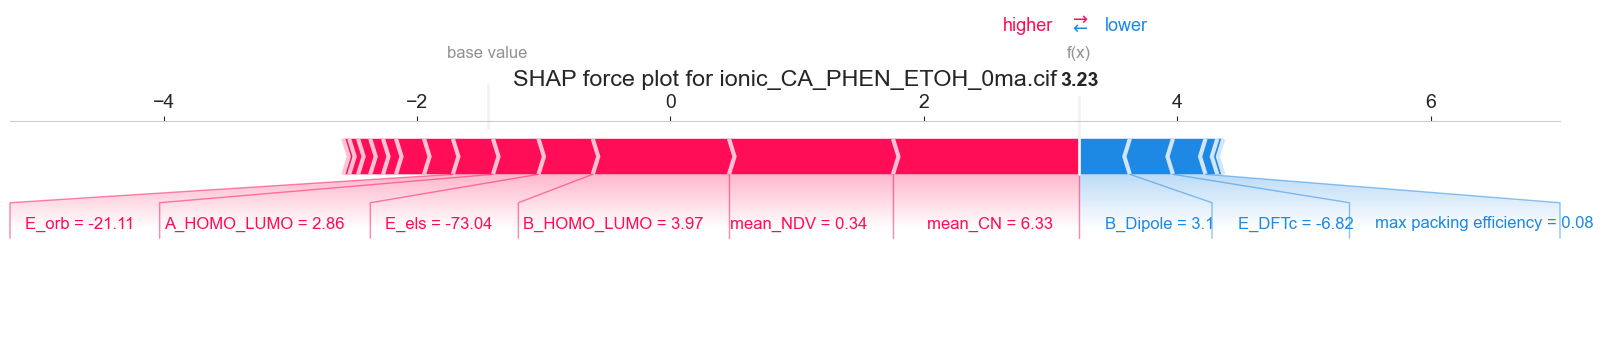

In [13]:
import shap
import matplotlib.pyplot as plt
import numpy as np
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features)
print(shap_values)

print(features.iloc[53].round(2))  
if len(features) > 53:
    shap_value = shap_values[53] if isinstance(shap_values, np.ndarray) else shap_values[0][53]  
    shap.force_plot(explainer.expected_value, shap_value, features.iloc[53].round(2), feature_names=features.columns, show=False,matplotlib=True,contribution_threshold=0.05)
    plt.grid(False) 
    plt.title('SHAP force plot for ionic_CA_PHEN_ETOH_0ma.cif')
    plt.show()
else:
    print("Row 53 does not exist in the features DataFrame.")

In [14]:
import shap
import matplotlib.pyplot as plt
import numpy as np
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features)
print(shap_values)
print(features.iloc[54].round(2)) 
if len(features) > 54:
    shap_value = shap_values[54] if isinstance(shap_values, np.ndarray) else shap_values[0][54] 
    shap.force_plot(explainer.expected_value, shap_value, features.iloc[54].round(2), feature_names=features.columns, show=False,matplotlib=True,contribution_threshold=0.045)
    plt.grid(False) 
    plt.title('SHAP force plot for ionic_LHY_CA_PHEN_150K.cif')
    plt.show()
else:
    print("Row 51 does not exist in the features DataFrame.")

[[-0.31204012 -0.99384207  0.04879967 ... -0.539759    0.42799294
  -0.1033419 ]
 [-0.15633263 -1.1099806   0.00942053 ...  0.5109365   0.30104834
  -0.1033419 ]
 [-0.14055735 -1.0670028   0.00942053 ...  0.33385885 -0.34557346
   0.10259666]
 ...
 [ 0.49369004  1.1248517   0.07066507 ...  0.1873159   0.02996794
  -0.00991192]
 [ 0.30414274 -1.111181   -0.15744722 ... -0.5315066  -0.34557346
  -0.07685491]
 [ 0.23661849 -1.1490111  -0.15744722 ...  0.12403648 -0.31260008
   0.07702231]]
A_HOMO_LUMO                 2.70
B_HOMO_LUMO                 3.97
A_Dipole                    5.23
B_Dipole                    3.09
mean_CN                     6.23
mean_NDV                    0.33
max packing efficiency      0.08
density                     1.65
vpa                        10.85
packing fraction            0.10
SC_atom                     6.17
SC_cell                   888.47
E_els                     -68.18
E_x                        -7.58
E_rep                      30.78
E_orb        

[[-0.31204012 -0.99384207  0.04879967 ... -0.539759    0.42799294
  -0.1033419 ]
 [-0.15633263 -1.1099806   0.00942053 ...  0.5109365   0.30104834
  -0.1033419 ]
 [-0.14055735 -1.0670028   0.00942053 ...  0.33385885 -0.34557346
   0.10259666]
 ...
 [ 0.49369004  1.1248517   0.07066507 ...  0.1873159   0.02996794
  -0.00991192]
 [ 0.30414274 -1.111181   -0.15744722 ... -0.5315066  -0.34557346
  -0.07685491]
 [ 0.23661849 -1.1490111  -0.15744722 ...  0.12403648 -0.31260008
   0.07702231]]
A_HOMO_LUMO                 2.93
B_HOMO_LUMO                 3.33
A_Dipole                    0.00
B_Dipole                    0.97
mean_CN                     6.44
mean_NDV                    0.34
max packing efficiency      0.08
density                     1.61
vpa                        11.13
packing fraction            0.10
SC_atom                     5.17
SC_cell                   372.23
E_els                     -24.44
E_x                       -14.36
E_rep                      50.10
E_orb        

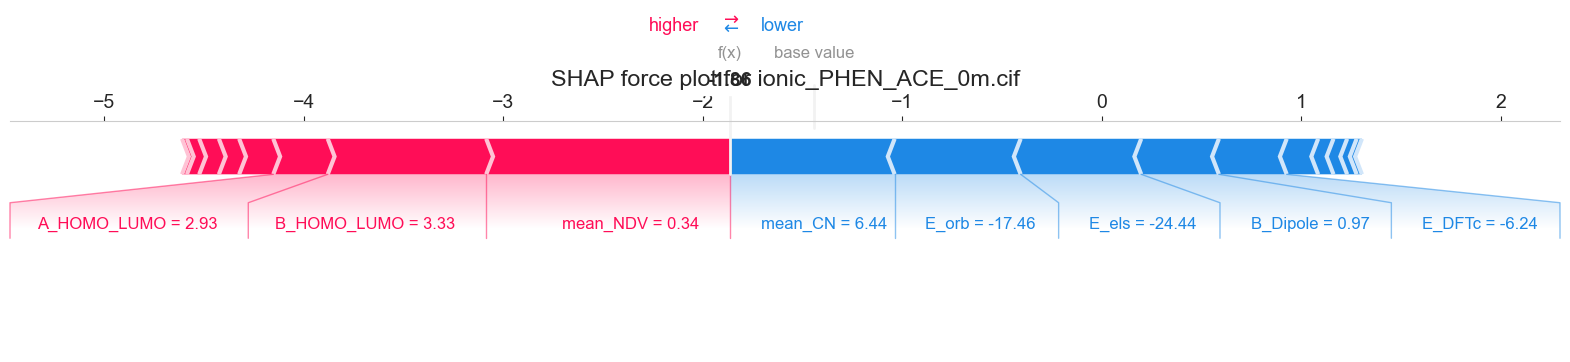

In [15]:
import shap
import matplotlib.pyplot as plt
import numpy as np
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features)
print(shap_values)
print(features.iloc[55].round(2))
if len(features) > 55:
    shap_value = shap_values[55] if isinstance(shap_values, np.ndarray) else shap_values[0][55]  
    shap.force_plot(explainer.expected_value, shap_value, features.iloc[55].round(2), feature_names=features.columns, show=False,matplotlib=True,contribution_threshold=0.06)
    plt.grid(False) 
    plt.title('SHAP force plot for ionic_PHEN_ACE_0m.cif')
    plt.show()
else:
    print("Row 51 does not exist in the features DataFrame.")

In [16]:
import shap
import matplotlib.pyplot as plt
import numpy as np
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features)
print(shap_values)
print(features.iloc[60].round(2))  
if len(features) > 60:
    shap_value = shap_values[60] if isinstance(shap_values, np.ndarray) else shap_values[0][60]
    shap.force_plot(explainer.expected_value, shap_value, features.iloc[60].round(2), feature_names=features.columns, show=False,matplotlib=True,contribution_threshold=0.06)
    plt.grid(False) 
    plt.rcParams['font.serif'] = 'Arial'
    plt.rcParams['font.size'] = 14

    plt.show()
else:
    print("Row 51 does not exist in the features DataFrame.")

[[-0.31204012 -0.99384207  0.04879967 ... -0.539759    0.42799294
  -0.1033419 ]
 [-0.15633263 -1.1099806   0.00942053 ...  0.5109365   0.30104834
  -0.1033419 ]
 [-0.14055735 -1.0670028   0.00942053 ...  0.33385885 -0.34557346
   0.10259666]
 ...
 [ 0.49369004  1.1248517   0.07066507 ...  0.1873159   0.02996794
  -0.00991192]
 [ 0.30414274 -1.111181   -0.15744722 ... -0.5315066  -0.34557346
  -0.07685491]
 [ 0.23661849 -1.1490111  -0.15744722 ...  0.12403648 -0.31260008
   0.07702231]]
A_HOMO_LUMO                 2.91
B_HOMO_LUMO                 4.63
A_Dipole                    0.00
B_Dipole                    0.41
mean_CN                     6.98
mean_NDV                    0.32
max packing efficiency      0.08
density                     1.66
vpa                        10.71
packing fraction            0.10
SC_atom                     5.04
SC_cell                   665.86
E_els                     -22.42
E_x                       -13.28
E_rep                      46.28
E_orb        

In [17]:
import shap
import matplotlib.pyplot as plt
import numpy as np
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features)
print(shap_values)
print(features.iloc[51].round(2))
if len(features) > 51:
    shap_value = shap_values[51] if isinstance(shap_values, np.ndarray) else shap_values[0][51]
    shap.force_plot(explainer.expected_value, shap_value, features.iloc[51].round(2), feature_names=features.columns, show=False,matplotlib=True,contribution_threshold=0.06)
    plt.grid(False)
    plt.rcParams['font.serif'] = 'Arial'
    plt.rcParams['font.size'] = 14

    plt.show()
else:
    print("Row 51 does not exist in the features DataFrame.")

[[-0.31204012 -0.99384207  0.04879967 ... -0.539759    0.42799294
  -0.1033419 ]
 [-0.15633263 -1.1099806   0.00942053 ...  0.5109365   0.30104834
  -0.1033419 ]
 [-0.14055735 -1.0670028   0.00942053 ...  0.33385885 -0.34557346
   0.10259666]
 ...
 [ 0.49369004  1.1248517   0.07066507 ...  0.1873159   0.02996794
  -0.00991192]
 [ 0.30414274 -1.111181   -0.15744722 ... -0.5315066  -0.34557346
  -0.07685491]
 [ 0.23661849 -1.1490111  -0.15744722 ...  0.12403648 -0.31260008
   0.07702231]]
A_HOMO_LUMO                 2.70
B_HOMO_LUMO                 4.07
A_Dipole                    5.25
B_Dipole                    6.58
mean_CN                     6.30
mean_NDV                    0.34
max packing efficiency      0.08
density                     1.70
vpa                        10.83
packing fraction            0.10
SC_atom                     5.00
SC_cell                   320.00
E_els                     -56.91
E_x                        -0.87
E_rep                       9.98
E_orb        

In [18]:
import numpy as np

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

labels = features.columns

# Calculate the contribution of each feature
feature_contributions = np.abs(shap_values).mean(axis=0)

# Create a DataFrame with one column for feature names and another for feature contributions
contribution_df = pd.DataFrame({
    'Feature': labels,
    'Contribution': feature_contributions
})

# Feature categories
category_map = {
    'mean_CN': 'Crystal-level feature',
    'E_DFTc': 'Intermolecular-level feature',
    'vpa': 'Crystal-level feature',
    'E_dc': 'Intermolecular-level feature',
    'B_HOMO_LUMO': 'Molecular-level feature',
    'A_HOMO_LUMO': 'Molecular-level feature',
    'mean_NDV': 'Crystal-level feature',
    'PF': 'Crystal-level feature',
    'SC_cell': 'Crystal-level feature',
    'SC_atom': 'Crystal-level feature',
    'B_Dipole': 'Molecular-level feature',
    'A_Dipole': 'Molecular-level feature',
    'E_x': 'Intermolecular-level feature',
    'density': 'Crystal-level feature',
    'max_PE': 'Crystal-level feature',
    'E_rep': 'Intermolecular-level feature',
    '5-norm': 'Crystal-level feature',
    'E_xrep': 'Intermolecular-level feature',
    'E_orb': 'Intermolecular-level feature',
    'E_els': 'Intermolecular-level feature',
}

# Map categories to the DataFrame
contribution_df['Category'] = contribution_df['Feature'].map(category_map)

# Sort the DataFrame by contribution in descending order
contribution_df_sorted = contribution_df.sort_values(by='Contribution', ascending=False)

# Save to a CSV file
contribution_df_sorted.to_csv('contribution_df_sorted.csv', index=False)

# Print the results
print(contribution_df_sorted)

                   Feature  Contribution                      Category
4                  mean_CN      1.118148         Crystal-level feature
1              B_HOMO_LUMO      1.001479       Molecular-level feature
5                 mean_NDV      0.972484         Crystal-level feature
15                   E_orb      0.478347  Intermolecular-level feature
3                 B_Dipole      0.464874       Molecular-level feature
12                   E_els      0.374332  Intermolecular-level feature
16                  E_DFTc      0.308151  Intermolecular-level feature
0              A_HOMO_LUMO      0.290511       Molecular-level feature
6   max packing efficiency      0.229123                           NaN
8                      vpa      0.152235         Crystal-level feature
11                 SC_cell      0.121029         Crystal-level feature
17                    E_dc      0.093617  Intermolecular-level feature
9         packing fraction      0.079728                           NaN
2     

In [20]:
# Sort the data by category and contribution, ensuring features of the same category are together and ordered by contribution
contribution_df_sorted = contribution_df_sorted.sort_values(by=['Category', 'Contribution'], ascending=[True, False])

# Create a function to generate a color gradient
def get_color_gradient(base_color, num_shades):
    # Generate a color gradient from light to dark
    gradient = np.linspace(0.4, 1, num_shades)  # Generate a gradient from light (0.4) to the base color (1)
    return [(base_color[0], base_color[1], base_color[2], shade) for shade in gradient]

# Define colors for the categories
category_colors = {
    'Crystal-level feature': (0.9, 0.7, 0.2, 1),  # Yellow
    'Intermolecular-level feature': (0.6, 0.3, 0.9, 1),  # Purple
    'Molecular-level feature': (0.7, 0.3, 0.3, 1),  # Dark red
}

# Default color for undefined categories
default_color = (0.8, 0.8, 0.8, 1)  # Gray

# Get the contribution data for the inner and outer rings
inner_contribution = contribution_df_sorted.groupby('Category')['Contribution'].sum()
outer_contribution = contribution_df_sorted.set_index('Feature')['Contribution']

# Check for undefined categories
undefined_categories = set(inner_contribution.index) - set(category_colors.keys())
if undefined_categories:
    print(f"Warning: The following categories do not have defined colors and will use the default color: {undefined_categories}")

# Create a color gradient for each category in the outer ring
outer_colors = []
for category in inner_contribution.index:
    # Select the data for the current category
    category_df = contribution_df_sorted[contribution_df_sorted['Category'] == category]
    # Get the base color for the category, or use the default color if not defined
    base_color = category_colors.get(category, default_color)
    # Generate a color gradient for the current category
    gradient_colors = get_color_gradient(base_color, len(category_df))
    outer_colors.extend(gradient_colors)

# Prepare labels for the inner and outer rings
inner_labels = inner_contribution.index
outer_labels = outer_contribution.index

# Plot the donut chart
fig, ax = plt.subplots(figsize=(8, 8), dpi=120)

# Plot the inner ring (category-level pie chart), showing percentages but not labels
ax.pie(inner_contribution, labels=['']*len(inner_contribution), autopct='%1.1f%%', radius=1, 
       colors=[category_colors.get(cat, default_color) for cat in inner_labels], wedgeprops=dict(width=0.3, edgecolor='w'))

# Plot the outer ring (feature-level pie chart), without labels or percentages
ax.pie(outer_contribution, labels=['']*len(outer_labels), radius=0.7, colors=outer_colors, wedgeprops=dict(width=0.3, edgecolor='w'))

# Add a white center circle to create a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.4, color='white'))

# Add a title
plt.title('Feature and Category Contribution by SHAP')
plt.savefig("Feature and Category Contribution by SHAP.pdf", format='pdf', bbox_inches='tight')
# Display the chart
plt.show()

In [21]:
import matplotlib.pyplot as plt
import pandas as pd


# Sort by contribution in descending order (if not already sorted)
contribution_df_sorted = contribution_df_sorted.sort_values(by='Contribution', ascending=False)

# Keep only the top 20 features
top_features = contribution_df_sorted.head(20)

# Prepare color list

category_colors = {
    'Crystal-level feature': (0.9, 0.7, 0.2, 1),  # Yellow
    'Intermolecular-level feature': (0.6, 0.3, 0.9, 1),  # Purple
    'Molecular-level feature': (0.7, 0.3, 0.3, 1),  # Dark red
}
bar_colors = [category_colors.get(cat, (0.8, 0.8, 0.8, 1)) for cat in top_features['Category']]

# Plot a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=1200)

# Draw the bar chart
ax.barh(top_features['Feature'], top_features['Contribution'], color=bar_colors)

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[cat]) for cat in category_colors]
labels = list(category_colors.keys())
ax.legend(handles, labels, loc='lower right')

# Set labels and title
ax.set_xlabel('Contribution')
ax.set_ylabel('Feature')
ax.set_title('Top 20 Feature Contributions by Category')

# Invert the y-axis so that the feature with the highest contribution is at the top
ax.invert_yaxis()

# Save the chart
plt.savefig("Top_20_Feature_Contributions_by_Category.pdf", format='pdf', bbox_inches='tight')

# Display the chart
plt.show()

In [23]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Sort by contribution in descending order (if not already sorted)
contribution_df_sorted = contribution_df_sorted.sort_values(by='Contribution', ascending=False)

# Keep only the top 20 features
top_features = contribution_df_sorted.head(20)

# Create a function to generate a color gradient
def get_color_gradient(base_color, num_shades):
    # Generate a color gradient from light to dark
    gradient = np.linspace(0.4, 1, num_shades)  # Generate a gradient from light (0.4) to the base color (1)
    return [(base_color[0], base_color[1], base_color[2], shade) for shade in gradient]

# Define colors for categories
category_colors = {
    'Crystal-level feature': (185/255, 184/255, 163/255, 1),  # Using RGB color corresponding to hex #B9B8A3
    'Intermolecular-level feature': (132/255, 151/255, 176/255, 1),  # Using RGB color corresponding to hex #8497B0
    'Molecular-level feature': (203/255, 153/255, 126/255, 1),  # Using RGB color corresponding to hex #CC9A81
}

# Default color for undefined categories
default_color = (0.8, 0.8, 0.8, 1)  # Gray

# Get the contribution data for the inner and outer rings
inner_contribution = top_features.groupby('Category')['Contribution'].sum()
outer_contribution = top_features.set_index('Feature')['Contribution']

# Check for undefined categories
undefined_categories = set(inner_contribution.index) - set(category_colors.keys())
if undefined_categories:
    print(f"Warning: The following categories do not have defined colors and will use the default color: {undefined_categories}")

# Create a color gradient for each category in the outer ring
outer_colors = []
for category in inner_contribution.index:
    # Select the data for the current category
    category_df = top_features[top_features['Category'] == category]
    # Get the base color for the category, or use the default color if not defined
    base_color = category_colors.get(category, default_color)
    # Generate a color gradient for the current category
    gradient_colors = get_color_gradient(base_color, len(category_df))
    outer_colors.extend(gradient_colors)

# Prepare labels for the inner and outer rings
inner_labels = inner_contribution.index
outer_labels = outer_contribution.index

# Create the figure and subplot
fig, ax = plt.subplots(figsize=(10, 8), dpi=1200)
# Set the background color to white
ax.set_facecolor('#ffffff')
# Add grid lines with custom style
ax.grid(False)
#ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)

# ---- Plot the bar chart ----
# Prepare the color list
bar_colors = [category_colors.get(cat, (0.8, 0.8, 0.8, 1)) for cat in top_features['Category']]

# Define font properties for labels and title (Arial, 16pt, bold)
label_title_font_prop = FontProperties(family='Arial', size=16, weight='bold')

# Define font properties for other text (Arial, 14pt)
font_prop = FontProperties(family='Arial', size=14)

# Plot the bar chart and set the font
bars = ax.barh(top_features['Feature'], top_features['Contribution'], color=bar_colors)
# Add text labels to each bar
# for bar in bars:
#     label_text = bar.get_width()
#     ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label_text:.2f}',
#             va='center', ha='left', fontproperties=font_prop)

# Set the font for labels and title
ax.set_xlabel('Contribution', fontproperties=font_prop)
ax.set_ylabel('Feature', fontproperties=font_prop)
ax.set_title('Feature Contributions by Category', fontproperties=label_title_font_prop)
# Modify the font size of X-axis labels
ax.tick_params(axis='x', labelsize=12)
# Modify the font size of Y-axis labels
ax.tick_params(axis='y', labelsize=10)

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=category_colors[cat]) for cat in category_colors]
labels = list(category_colors.keys())
ax.legend(handles, labels, loc='lower right')

# Invert the Y-axis so that the feature with the highest contribution is at the top
ax.invert_yaxis()

# ---- Embed a donut chart in the bar chart ----
# Create an inset axis
inset_ax = inset_axes(ax, width=3, height=3, loc='upper right', bbox_to_anchor=(0.8, 0.4, 0.2, 0.3), bbox_transform=ax.transAxes)

# Custom autopct formatting function to set font size
def custom_autopct(pct):
    return f'{pct:.1f}%'

# Plot the inner ring (category-level pie chart), showing percentages but not labels
inner_wedges, inner_texts, inner_autotexts = inset_ax.pie(
    inner_contribution, labels=['']*len(inner_contribution), autopct=custom_autopct, radius=1,
    colors=[category_colors.get(cat, default_color) for cat in inner_labels], wedgeprops=dict(width=0.3, edgecolor='w')
)

# Modify the font size of the inner ring percentages
for autotext in inner_autotexts:
    autotext.set_fontsize(12)

# Plot the outer ring (feature-level pie chart), without labels or percentages
inset_ax.pie(outer_contribution, labels=['']*len(outer_labels), radius=0.7, colors=outer_colors, wedgeprops=dict(width=0.3, edgecolor='w'))

# Add a white center circle to create a donut chart
inset_ax.add_artist(plt.Circle((0, 0), 0.4, color='white'))

# Modify the font size of the inner ring percentages
for autotext in inner_autotexts:
    autotext.set_fontsize(12)  # Set to 10pt font size, can be adjusted as needed
    autotext.set_rotation(0)  # Set text to not rotate, ensuring it is horizontal

plt.savefig("Combined_Feature_Contributions_and_Circular_Chart_CCDC.pdf", format='pdf', bbox_inches='tight')
# Display the chart
plt.show()